In [4]:
#essential imports
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize

#scraping imports
import requests
from bs4 import BeautifulSoup

#plotting imports
%matplotlib inline
import matplotlib.pyplot as plt

#String matching
import re

# Date
import datetime as dt
# Sleep
import time

# Strict JSON conversion
import json 
import gzip 

# Progress display
from IPython.display import clear_output

# Amazon API querying
from amazon.api import AmazonAPI
from amazon.api import AsinNotFound

#garbage collector
import gc

datapath = 'DATA/review'

In [5]:
def gz_to_dataframe(datapath, filename):
    def parse(path): 
        g = gzip.open(path, 'rb') 
        for l in g: 
            yield eval(l) 
    def getDF(path): 
        i = 0 
        df = {} 
        for d in parse(path): 
            df[i] = d 
            i += 1 
        return pd.DataFrame.from_dict(df, orient='index') 
    return getDF(datapath+filename)

In [6]:
dfList = ['reviews_Amazon_Instant_Video_5.json.gz',
          'reviews_CDs_and_Vinyl_5.json.gz',
          'reviews_Digital_Music_5.json.gz',
          'reviews_Movies_and_TV_5.json.gz']
#'reviews_Kindle_Store_5.json.gz'
#'reviews_Books_5.json.gz'


In [7]:
len(dfList)

4

In [29]:
def str2Date(s):
    month,day,year = s.split(" ")
    return int(year), int(month), int(day.replace(",",""))

def computeAgg(filenames, classification = ['year','month']):
    for i,filename in enumerate(filenames):
        print("starting opening: ",filename)
        df = gz_to_dataframe(datapath, filename)
        print("finished opening")
        df['year'], df['month'], df['day'] =  zip(*df['reviewTime'].map(str2Date))
        df2 = df[['year','month','day']]
        del df
        gc.collect()
        df3 = df2.groupby(classification).size()
        del df2
        gc.collect()
        print("df is appended")
        if i==0:
            b = df3
        else:
            b = b.add(df3, fill_value=0)
    print("finished the aggregation")
    return b 

b = computeAgg(dfList)

starting opening:  reviews_Amazon_Instant_Video_5.json.gz
finished opening
df is appended
starting opening:  reviews_CDs_and_Vinyl_5.json.gz
finished opening
df is appended
starting opening:  reviews_Digital_Music_5.json.gz
finished opening
df is appended
starting opening:  reviews_Movies_and_TV_5.json.gz
finished opening
df is appended
finished the aggregation


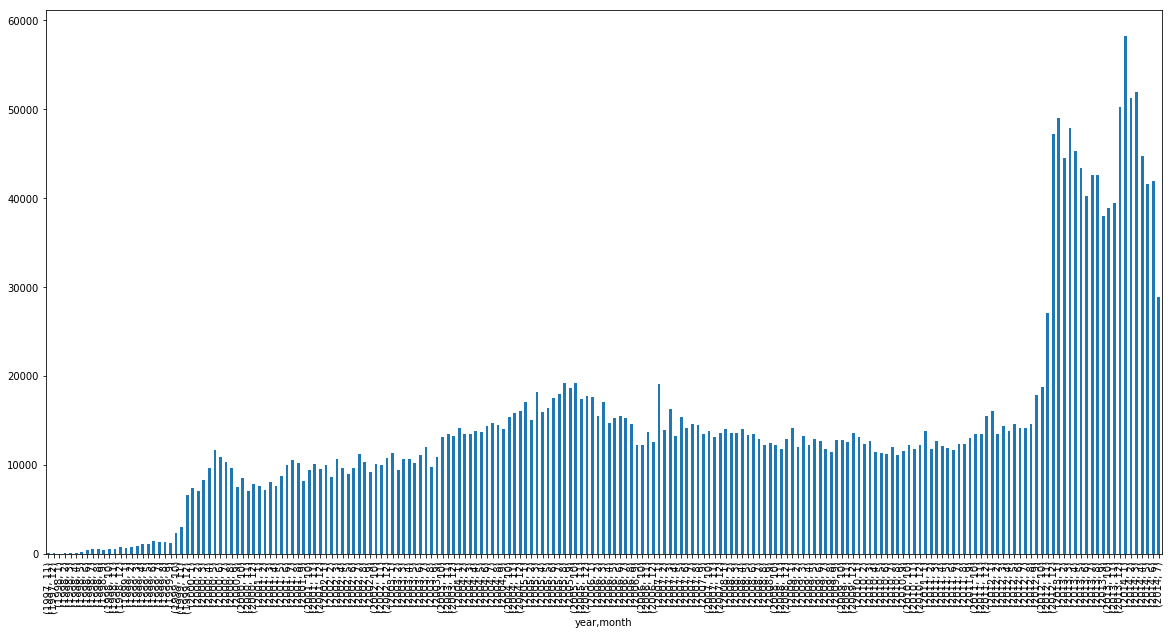

In [30]:
b.plot.bar(figsize=(20,10))

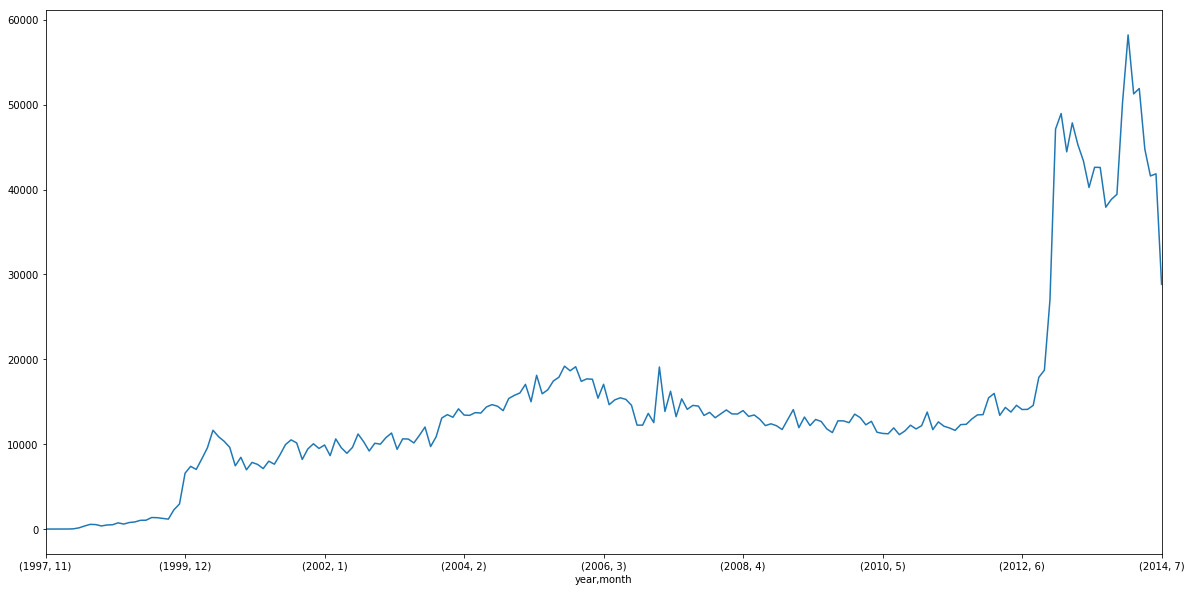

In [31]:
b.plot(figsize=(20,10))